In [2]:
# create the logic for analyzing the data

import pandas as pd
import numpy as np


datos = pd.read_csv('assets/hour.csv')

datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# separate the data from categories and numbers

categories = [
    "season",
    "yr",
    "mnth",
    "hr",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
    
]

numbers = [
    "temp",
    "atemp",
    "hum",
    "windspeed",
]

variables = categories + numbers

classes = ['cnt']

variablesClasses = variables + classes

# check the numbers variables
print(datos[numbers].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [4]:
# check the variables categories

print(datos[categories].astype('category').describe())

        season     yr   mnth     hr  holiday  weekday  workingday  weathersit
count    17379  17379  17379  17379    17379    17379       17379       17379
unique       4      2     12     24        2        7           2           4
top          3      1      5     17        0        6           1           1
freq      4496   8734   1488    730    16879     2512       11865       11413


In [5]:
# check the empty values
print(datos.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [6]:
# check the classes

print(datos[classes].describe())

                cnt
count  17379.000000
mean     189.463088
std      181.387599
min        1.000000
25%       40.000000
50%      142.000000
75%      281.000000
max      977.000000


In [7]:
# get the range intercuartil 25
Q1 = datos.cnt.quantile(0.25)

# get the range intercuartil 75
Q3 = datos.cnt.quantile(0.75)

# check the difference 
iqr = Q3 - Q1

# get the lower bound
lower_bound = Q1 - (1.5 * iqr)

# get the upper bound
upper_bound = Q3 + (1.5 * iqr)

# filter the data using the lower and upper bound
datosFiltered = pd.DataFrame(
    datos[variablesClasses].loc[
        (datos.cnt >= lower_bound) 
        & (datos.cnt <= upper_bound)
    ]
)

# check the number of rows
print("The example has with outliers data: {}".format(len(datos)))
print("The example has without outliers data: {}".format(len(datosFiltered)))


The example has with outliers data: 17379
The example has without outliers data: 16874


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


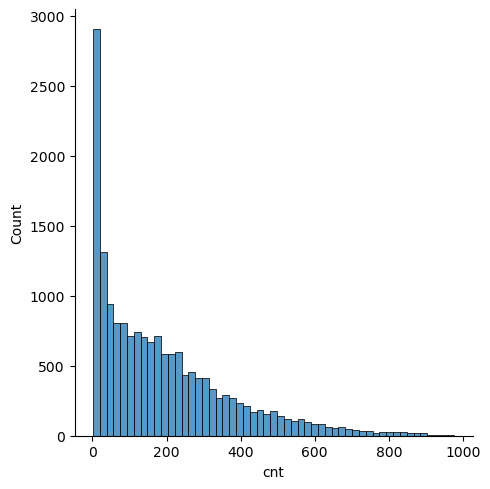

In [8]:
import seaborn as sns

# create the graphs
sns.displot(datos.cnt)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


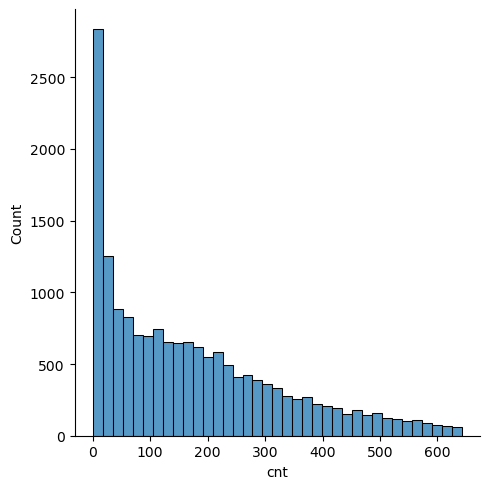

In [11]:
# graph the filtered data
sns.displot(datosFiltered.cnt)

In [16]:
# idk how to install this library
# import graphviz

# sns.displot(datos.cnt)
# sns.displot(datosFiltered.cnt)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

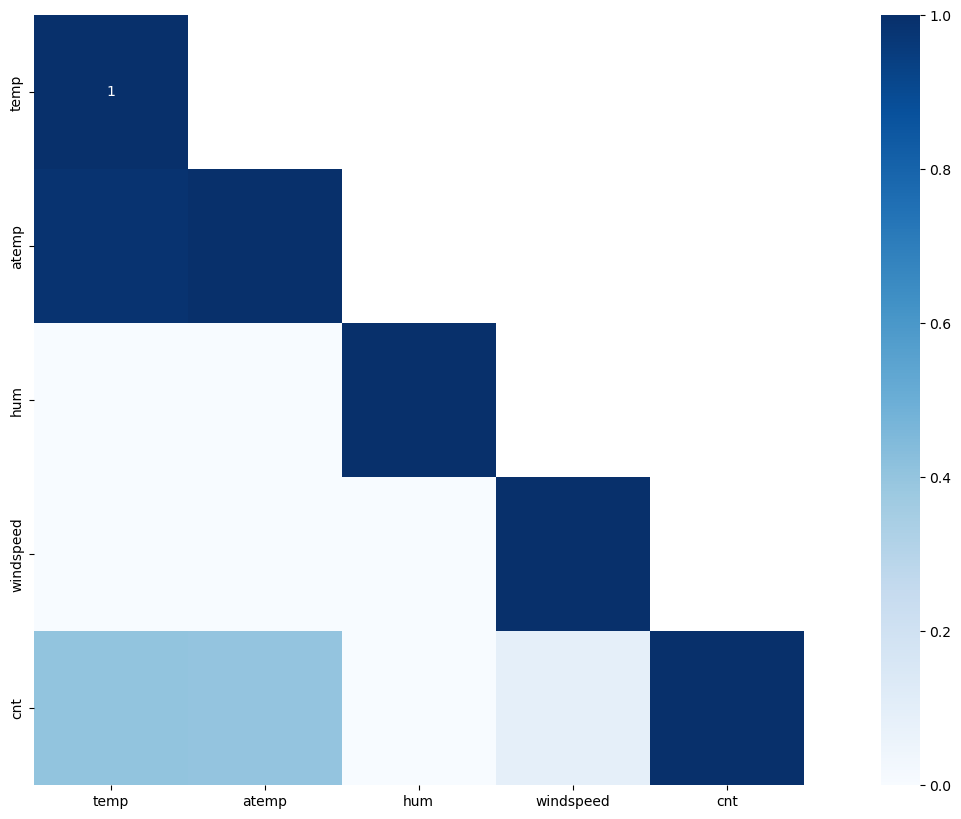

In [9]:
import matplotlib.pyplot as plt

# create matriz of correlation
matriz = datos[numbers + classes].corr()
heat = np.array(matriz)

heat[np.tril_indices_from(heat)] = False

# create warn map
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

sns.heatmap(matriz, mask=heat, vmax=1.0, vmin=0.0, square=True, annot=True, cmap="Blues")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# create tree of decision
values = datosFiltered[variablesClasses]
valuesColumns = datosFiltered[variablesClasses].columns.values

# create a classes of the data
valuesClasses = datosFiltered[classes]

X_train, X_test, y_train, y_test = train_test_split(values, valuesClasses, test_size=0.2, random_state=0)

# creare the model 
Model = DecisionTreeRegressor(max_depth=5)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


+-----------------------+------+-------+----------+
|         Model         | RMSE | RMSLE | R2 Score |
+-----------------------+------+-------+----------+
| DecisionTreeRegressor | 5.10 |  0.17 |   1.00   |
+-----------------------+------+-------+----------+


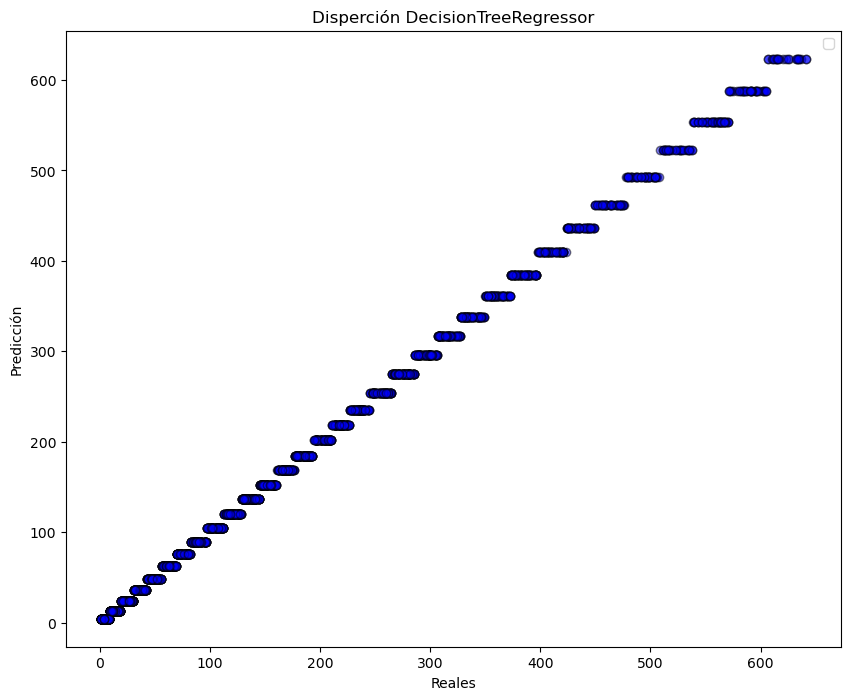

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prettytable import PrettyTable

def evaluateMetricRegresion(estimator, xTrain, yTrain, xTest, yTest):
    table = PrettyTable()

    table.field_names = ["Model", "RMSE", "RMSLE", "R2 Score"]

    estimator.fit(xTrain, yTrain)

    yPred = estimator.predict(xTest)

    rmse = np.sqrt(metrics.mean_squared_error(yTest, yPred))

    score = estimator.score(xTest, yTest)

    rmsle = np.sqrt(metrics.mean_squared_log_error(yTest, yPred))

    table.add_row([
        type(estimator).__name__,
        format(rmse, '.2f'),
        format(rmsle, '.2f'),
        format(score, '.2f')
    ])

    print(table)

    plt.figure(figsize=(10, 8))
    plt.scatter(x=yTest, y=yPred, marker='o', c='b', edgecolors=(0, 0, 0), alpha=0.5)
    plt.title("Disperción {}".format(type(estimator).__name__))
    plt.ylabel("Predicción")
    plt.xlabel("Reales")
    plt.legend()
    plt.show()


evaluateMetricRegresion(Model, X_train, y_train, X_test, y_test)